In [1]:
import numpy as np
import matplotlib.pyplot as plt
import serial
from scipy import signal
from scipy.signal import butter, filtfilt
import pandas as pd

In [2]:
esp = serial.Serial("COM3", 115200)
    
l = []
l_reposo = []

seg = 16
muestras = seg*500   #está muestreando a 500 muestras en un segundo

#tomar máximo y mínimo de un intervalo de tiempo y despues compara en base a eso lo que se mandará 

for i in range(muestras): 
    l2 = esp.readline().decode('utf-8')
    l2 = float(l2)
    l.append(l2)
    if 1500>i:
        l_reposo.append(l2)
    d_min = min(l_reposo)
    d_max = max(l_reposo)

    lim_up = d_max + d_max*0.08
    lim_down = d_min - d_min*0.08
    uno = '1'
    cero = '0'


    if l2 > lim_up: #or lim_down > l2:
        esp.write(uno.encode())
    else:
        esp.write(cero.encode())

len(l)

KeyboardInterrupt: 

ValueError: x and y must have same first dimension, but have shapes (8000,) and (82,)

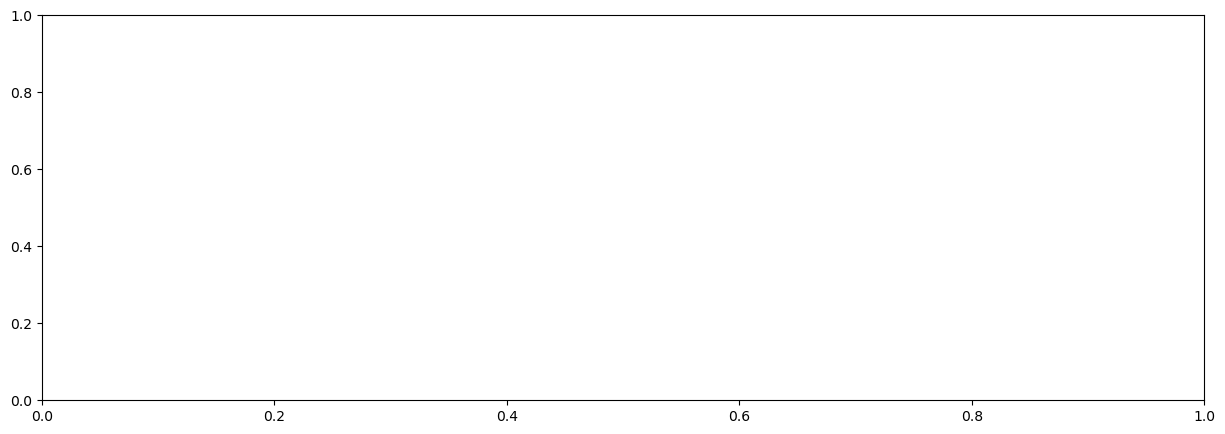

In [3]:
tiempo = np.arange(0, seg, 0.002)  #Desde cero hasta X segundos en un muestreo de  500 muestras por segundo  
#len(tiempo)

fm = 500 # 500[Hz] frecuencia de muestreo
T = 1/fm # Periodo del muestreo
largo_señal = len(l) # Largo de la señal 1
duracion_señal = T * largo_señal
tiempo_señal = np.arange(0, duracion_señal, T)

plt.figure(figsize = (15,5))

plt.subplot(111)
plt.plot(tiempo,l) # 
plt.grid(True)
